In [212]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

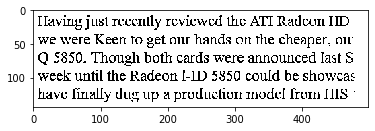

True

In [5]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [6]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

print(pytesseract.image_to_string('out.png'))


Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


In [9]:
str = pytesseract.image_to_string("mart5.jpg")
print(str)

03
°
No. 0861

AbSERIY a:

zl2 HS -
Ae.

2:40-22:
2.739km
42007!
4200%

etAtS{LIct.


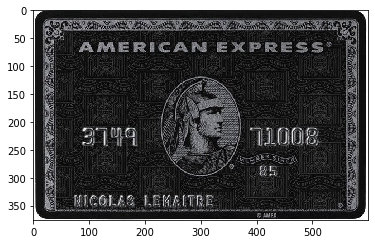


------------------------------------------------------


In [16]:
str = pytesseract.image_to_string("card.jpg")
img=cv2.imread("card.jpg")
imshow("",img)
print(str)
print("------------------------------------------------------")

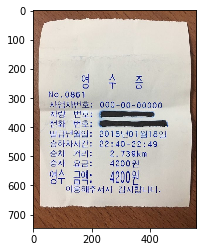

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.
------------------------------------------------------


In [21]:
str = pytesseract.image_to_string("mart5.jpg",lang="kor")
img=cv2.imread("mart5.jpg")
imshow("",img)
print(str)
print("------------------------------------------------------")

I found 4 books in that image


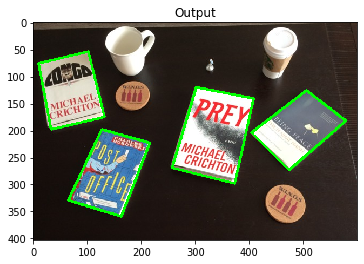

In [22]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

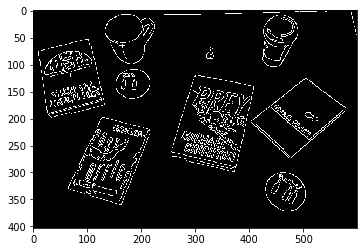

In [26]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("",edged)

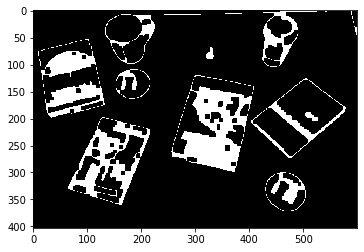

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow("",closed)

I found 4 books in that image


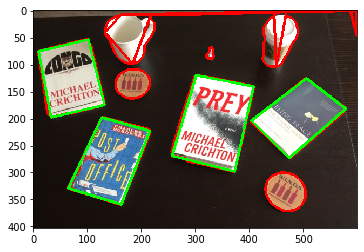

In [33]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

cv2.drawContours(image, cnts, -1,(0, 0, 255),1)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))

imshow("",image)


[[[302 138  28]
  [240 274  28]
  [426 272  29]
  [296 258  28]
  [356 272  29]
  [176 262  28]
  [256 330  29]
  [240 136  29]
  [264 388  29]
  [360 338  29]
  [198 316  28]
  [242 200  28]
  [ 82 134  29]
  [180 204  28]
  [178 134  29]
  [250  70  29]
  [366 146  29]
  [324 382  29]
  [308  78  28]]]
[(255, 2166), (0, 970)]
[(255, 2095), (0, 1041)]
[(0, 2883), (255, 481)]
[(255, 2130), (0, 1006)]
[(255, 2362), (0, 1002)]
[(255, 2121), (0, 1015)]
[(255, 2258), (0, 1106)]
[(255, 2366), (0, 998)]
[(0, 3025), (255, 339)]
[(0, 2865), (255, 499)]
[(0, 2998), (255, 138)]
[(0, 2881), (255, 255)]
[(255, 2349), (0, 1015)]
[(0, 2914), (255, 222)]
[(0, 3043), (255, 321)]
[(0, 3038), (255, 326)]
[(0, 3007), (255, 357)]
[(255, 2255), (0, 1109)]
[(0, 2893), (255, 243)]


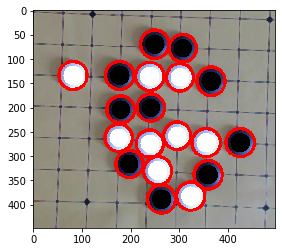

In [50]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('stone.png')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨


#영상에서 원모양을 찾아주는 함수
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 10, param1=40, param2=30, minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img,(x,y),r,(0,0,255),5)
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

[[[216 106  24]
  [ 64  38  25]
  [ 48 276  24]
  [134  52  24]
  [ 48  98  24]
  [176  84  24]
  [152 190  24]
  [204 156  24]
  [174 242  24]
  [ 22 138  24]
  [178 290  24]
  [196 202  25]
  [ 28 192  24]
  [160 138  26]
  [132 100  24]
  [ 96 198  22]
  [ 90 120  25]
  [ 64 164  24]
  [120 156  24]
  [132 288  23]
  [128 230  24]
  [ 90  78  19]
  [ 60 228  26]
  [ 92 262  24]]]


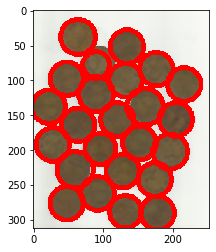

In [67]:
img = cv2.imread('water_coins.jpg')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 10, param1=35, param2=30, minRadius=10, maxRadius=50)
circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img,(x,y),r,(0,0,255),5)
    
  

imshow("", img)

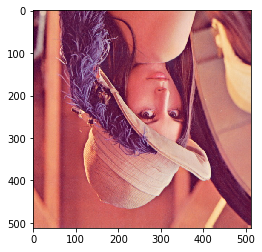

In [68]:
#좌우,상하반전
img =cv2.imread('lena.jpg')
img2=cv2.flip(img,0) #1은 좌우 반전,0은 상하 반전
imshow("",img2)

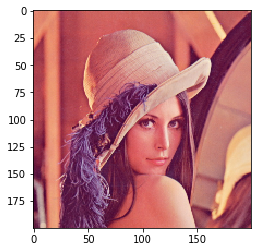

In [74]:
#값으로 늘리고 줄이기
zoom1=cv2.resize(img,(200,200))
imshow("",zoom1)

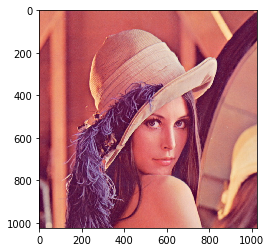

In [76]:
#x축과 y축의 비율로 조정 
zoom2=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
imshow("",zoom2)

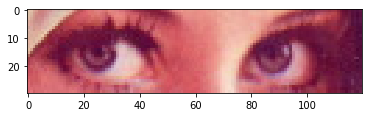

In [94]:
#잘라내기
cropping=img[250:280,240:360]
imshow("",cropping)


[128 138 225]


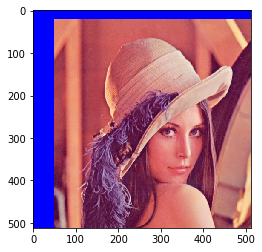

In [99]:
#변환행렬
height,width=img.shape[:2]
M=np.float32([[1,0,50],[0,1,20]])
c=img[0,0]
dst=cv2.warpAffine(img,M,(width,height),borderValue=(255,0,0))
iimshow("",dst)

움직인 x,y: 1 4


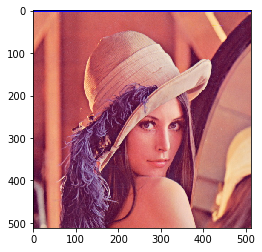

움직인 x,y: -3 8


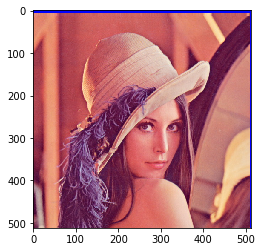

움직인 x,y: -1 -11


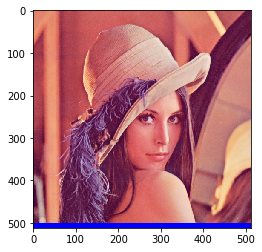

움직인 x,y: -11 -11


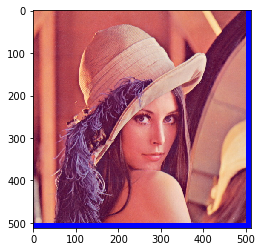

움직인 x,y: -9 2


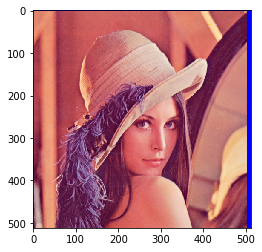

움직인 x,y: -5 -2


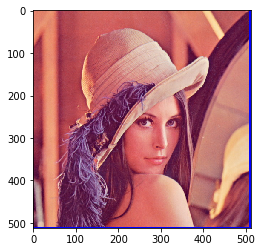

움직인 x,y: -5 -5


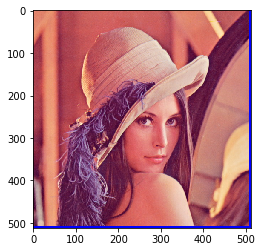

움직인 x,y: -7 1


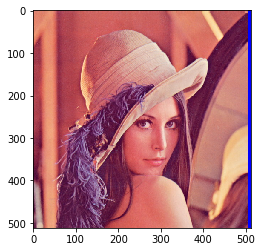

움직인 x,y: -11 9


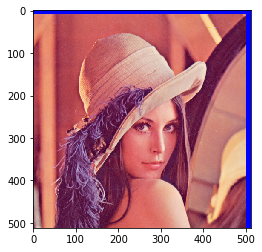

움직인 x,y: -1 -6


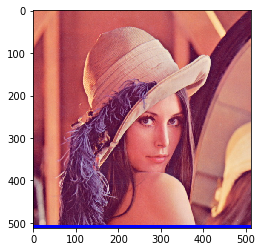

In [119]:
import random

#변환행렬

for _ in range(10):
    x=random.randrange(-11,11)
    y=random.randrange(-11,11)
    M=np.float32([[1,0,x],[0,1,y]])
    dst=cv2.warpAffine(img,M,(width,height),borderValue=(255,0,0))
    print("움직인 x,y:",x,y)
    imshow("",dst)

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


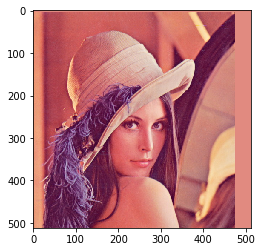

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


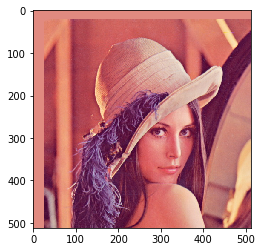

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


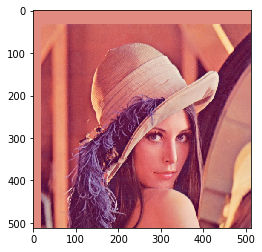

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


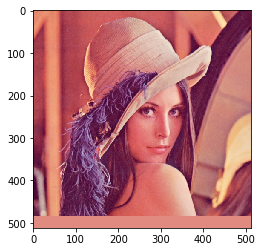

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


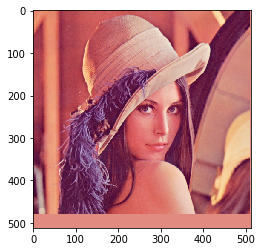

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


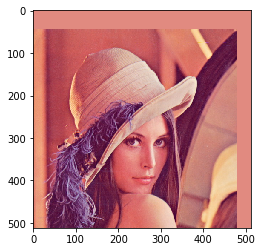

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


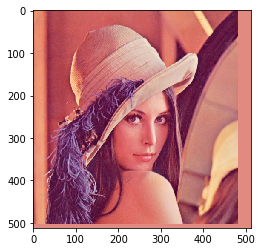

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


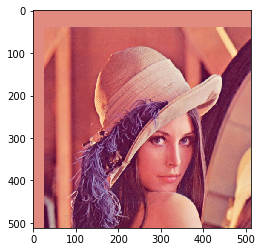

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


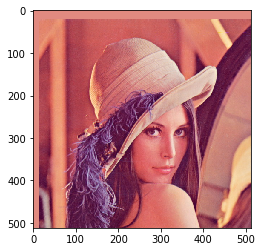

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


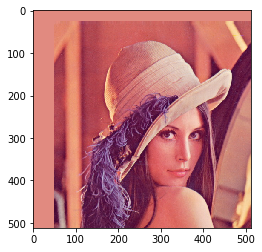

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


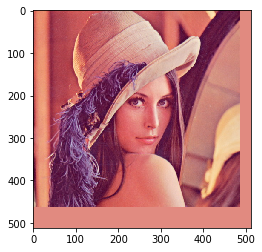

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


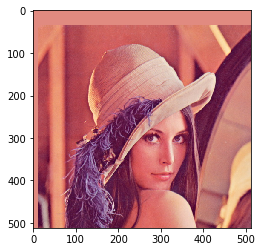

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


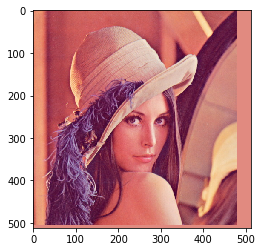

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


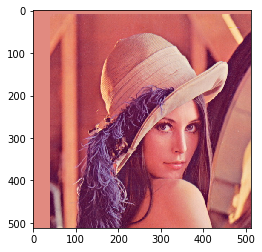

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


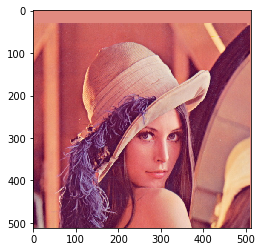

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


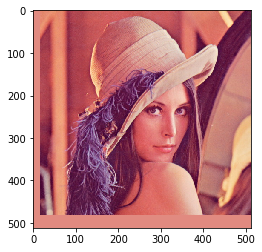

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


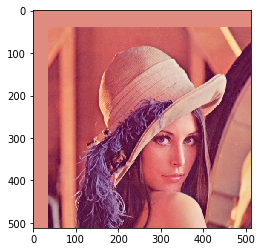

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


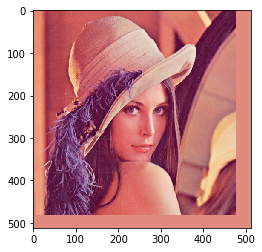

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


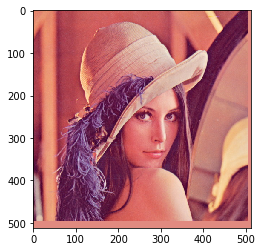

움직인 x,y: [[-38   4]
 [ 27  20]
 [ 18  32]
 [  1 -28]
 [ -2 -34]
 [-33  44]
 [-31 -10]
 [ 26  40]
 [ 14  20]
 [ 49  27]
 [-25 -50]
 [ 11  35]
 [-32  -7]
 [ 40   9]
 [ -2  30]
 [ 16 -30]
 [ 36  39]
 [-35 -31]
 [ -8 -17]
 [ 21 -31]] -6


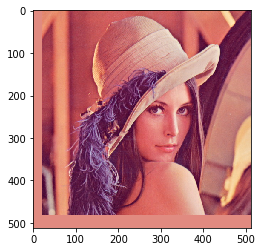

In [128]:
import random
height,width=img.shape[:2]
dx=50
x=np.random.randint(dx*2,size=(20,2))-dx
M=np.float32([[1,0,0],[0,1,0]])
c=img[0,0]
for p in x.tolist():
    M[:,2]=p
    dst=cv2.warpAffine(img,M,(width,height),borderValue=(int(c[0]),int(c[1]),int(c[2])))
    print("움직인 x,y:",x,y)
    imshow("",dst)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


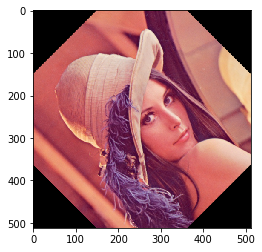

In [131]:
#변환행렬
height,width=img.shape[:2]
img_center=(width/2,height/2)

M=cv2.getRotationMatrix2D(img_center,45,1.0)
print(M)
c=img[0,0]
rotated_image=cv2.warpAffine(img,M,(width,height),borderValue=(0,0,0))
imshow("",rotated_image)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [811.   0.]
 [  0. 577.]
 [811. 577.]]
[[ 6.11584185e-01 -1.56772284e-01  1.15494658e+01]
 [ 2.26751420e-01  9.26033771e-01 -1.71882333e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


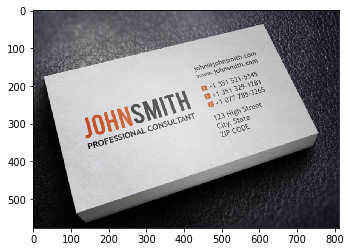

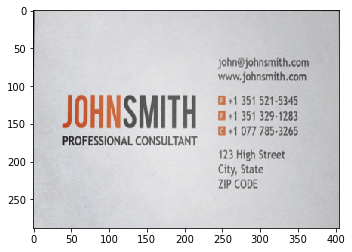

In [214]:
img = cv2.imread("namecard.png")

height, width = img.shape[:2]

# 좌표 순서 - 상단왼쪽 끝, 상단오른쪽 끝, 하단왼쪽 끝, 하단오른쪽 끝
point_list = [[27, 179], [611,36], [118,534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                   list(point_list[1]),
                   list(point_list[2]),
                   list(point_list[3])])
pts1 = np.array([[27, 179], [611,36], [118,534], [754,325]], dtype="float32")
print(pts1)

pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
print(pts2)


pts2 = np.float32([[0,0],[width/2,0],[0,height/2],[width/2,height/2]])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)


#img_result = cv2.warpPerspective(img, M, (width,height))
img_result = cv2.warpPerspective(img, M, (int(width/2),int(height/2)))
imshow("", img)
imshow("", img_result)

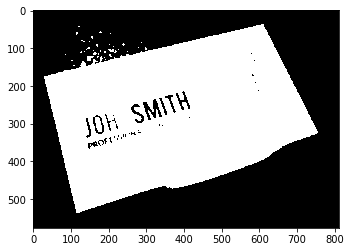

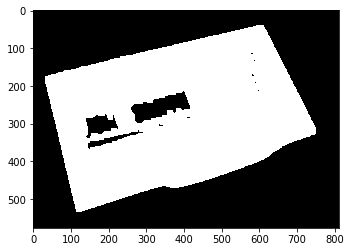

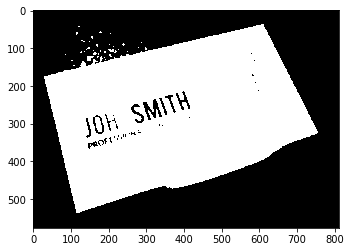

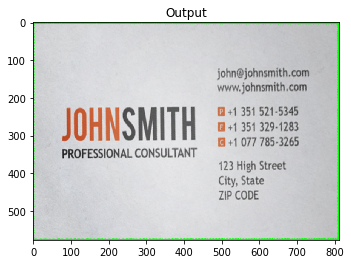

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www.johnsmith.com

@ +1 351 521-5345
fi +1 351 329-1283
+1 077 785-3265

123 High Street
City, State
ZIP CODE


In [286]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

image = cv2.imread("namecard.png")
image_copy=image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 0)

thr,mask=cv2.threshold(gray,0,255,cv2.THRESH_BINARY +cv2.THRESH_OTSU)
opened = cv2.morphologyEx(mask,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)),iterations=7)
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        cv2.drawContours(image_copy, [approx], -1, (0, 255, 0), 4)
        
        pts1 = np.array(approx, dtype="float32")
        pts2 = np.float32([[width,0],[0,0],[0,height],[width,height]])
        
        M = cv2.getPerspectiveTransform(pts1,pts2)

        image_result = cv2.warpPerspective(image_copy, M, (int(width),int(height)))


str = pytesseract.image_to_string(image_result)
print(str)
